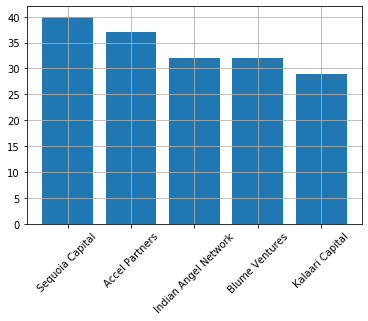

In [4]:
'''
Q.3.
After re-analysing the dataset you found out that some investors have invested in the 
same startup at different number of funding rounds. So before finalising the previous list, 
you want to improvise it by finding the top 5 investors who have invested in different 
number of startups. This list will be more helpful than your previous list in finding the 
investment for your friend startup. Find the top 5 investors who have invested maximum number 
of times in different companies. That means, if one investor has invested multiple times in 
one startup, count one for that company. There are many errors in startup names. 
Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Answer: I have followed the answer of question Q.1 and Q.2, herein I just need to twick the case,
i.e I need to store all unique startups names wherein investor invested. Before that I have made sure
all the mentioned startup names are modified accordingly using updateStartupName. Previously I was 
storing the occurence of Investor but here I will be storing the startupname wherein Investor invested.
So my investors dictory will contain all the investors and their investments in differnt startup. 
Here I am storing the startup names in set so if startup name is already present so I don't need to 
count it one more time. So investors will store like this {'InvestorName':{'Startup1','Startup2'}}. In
order to make the above logic I will need to combine startupname and investornames so I did that by 
creating one more column with name startup_investor. Once it has been done, I have applied one function
with name startup_investors wherein I have implemented the above logic. 

       In the next step what I have done, I have investors and all the startup associated with them, so 
I have made one list of list wherein I have store count of different startup and the investorname. After
that I have sorted the list of list with first column and picked top five investors and ignore undisclosed 
investor. At last I have made two different list just to plot the bar graph. From the bar graph if we see
still Sequoia Capital has invested maximum number of times in different startups, so It will be good choice
to approach Sequoia Capital.




'''

# Packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# City Locations where startup can be estabilished 
target_locations = {'Bangalore','Mumbai','Gurgaon','Noida','New Delhi'}


# City Name Extraction 
def city_name(name):
    return name.split('/')[0].strip()


# Filter Cities and make other null
def filter_city(city):
    if city in target_locations:
        return city
    return ''


# Update Startup Names
def updateStartupName(name):
    oyonames = ['Oyo Rooms','OYO Rooms','OyoRooms','Oyorooms','Oyo']
    olanames = ['Olacabs','Ola','Ola Cabs']
    flipkartnames = ['Flipkart.com','Flipkart']
    paytmnames = ['Paytm','Paytm Marketplace']
    if name in oyonames:
        return 'Oyo'
    if name in olanames:
        return 'Ola'
    if name in flipkartnames:
        return 'Flipkart'
    if name in paytmnames:
        return 'Paytm'
    return name


# Investors and its funded startups names
investors = {}

def startup_investors(startup_investor):
    startup_investor = str(startup_investor)
    startupname = startup_investor.split('###')[0].strip().title()
    investornames = startup_investor.split('###')[1]
    investornames = investornames.split(',')
    for name in investornames:
        name = name.strip().title()
        if name!='':
            if investors.get(name) is None:
                investors[name] = set([startupname])
            else:
                if startupname not in investors[name]:
                    investors[name].add(startupname)
    return startup_investor


# File data to Pandas DataFrame
df_startups = pd.read_csv('startup_funding.csv',encoding='utf-8')
df_startups['CityLocation'].dropna(inplace = True) # Cities without any name removed
df_startups['CityLocation'] = df_startups['CityLocation'].apply(city_name) # First City Name

# Handle Case Sensitive and Proper Name 
df_startups['CityLocation'].replace('Delhi','New Delhi', inplace = True) 
df_startups['CityLocation'].replace('bangalore','Bangalore',inplace = True)


# Only cities where friend wants to estabilish startup.
df_startups['CityLocation'] = df_startups['CityLocation'].apply(filter_city)
index = df_startups[df_startups['CityLocation']==''].index
df_startups.drop(index,inplace=True)


# Drop null valued rows
df_startups = df_startups[pd.notna(df_startups['StartupName'])]
df_startups = df_startups[pd.notna(df_startups['InvestorsName'])]
df_startups['StartupName'] = df_startups['StartupName'].apply(updateStartupName)

# Combined Investors Names and Startup Name to get the Investors Dictionary gets filled properly
df_startups['startup_investor'] = df_startups['StartupName'] + '###' + df_startups['InvestorsName']
df_startups['startup_investor'] = df_startups['startup_investor'].apply(startup_investors)

investor_counts = [[len(value),key]for key, value in investors.items()]
investor_counts.sort(reverse=True)
investor = [ i[1] for i in investor_counts[1:6]]
counts = [ i[0] for i in investor_counts[1:6]]

plt.bar(investor,counts)
plt.xticks(rotation=45)
plt.grid()
plt.show()
